In [ ]:
# Prepare mnist data and run LeNet

In [11]:
import struct
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl
import os

In [24]:
def read_data(dataset = "training", path = "."):
    
    cur_path = os.getcwd()
    
    with open ('{}/mnist_data/train-labels-idx1-ubyte'.format(cur_path), 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)
    
    with open ('{}/mnist_data/train-images-idx3-ubyte'.format(cur_path), 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.int8).reshape(len(lbl),rows, cols)
    get_img = lambda idx: (lbl[idx], img[idx])
    
    # Now we create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)
        

In [32]:
def show(image):
    
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

def ascii_show(image):
    
    for i in image:
        row = ""
        for j in i:
            row += '{:02X}'.format(j)+ ' '
        print (row)
        

In [25]:
training_data = list(read_data(dataset = "training", path= '../dev/LeNet_hands_on/mnist_data/'))
label, pixel = training_data[0]
print(len(training_data))
print(label)
print(pixel.shape)

/Users/denniswu/dev/LeNet_hands_on
60000
5
(28, 28)


/Users/denniswu/dev/LeNet_hands_on


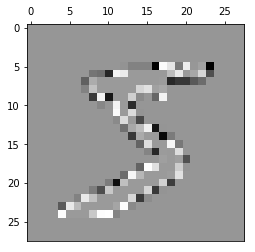

In [30]:
training_data = list(read_data(dataset="training",path='../dev/LeNet_hands_on/mnist_data/'))
label, pixel = training_data[0]
show(pixel)

In [33]:
ascii_show(pixel)

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 03 12 12 12 7E -78 -51 1A -5A -1 -9 7F 00 00 00 00 
00 00 00 00 00 00 00 00 1E 24 5E -66 -56 -3 -3 -3 -3 -3 -1F -54 -3 -E -3D 40 00 00 00 00 
00 00 00 00 00 00 00 31 -12 -3 -3 -3 -3 -3 -3 -3 -3 -5 5D 52 52 38 27 00 00 00 00 00 
00 00 00 00 00 00 00 12 -25 -3 -3 -3 -3 -3 -3A -4A -9 -F 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 50 -64 6B -3 -3 -33 0B 00 2B -66 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 0E 01 -66 -3 5A 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 -75 -3 -42 02 00

In [34]:
pixels = np.zeros([28,28])
for i in range(10):
    label, pixel = training_data[i]
    pixels += pixel
pixels = pixels/10

In [35]:
ascii_show(pixels.astype(np.uint8))

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 F5 00 FC 08 F7 00 F7 05 00 00 FA FA 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 07 03 12 00 08 0E FE 0F 00 F6 FA 02 02 00 00 00 00 
00 00 00 00 06 08 00 00 03 07 FE F4 EF 07 EF 03 FF 06 F9 EC 04 F4 FE 0F 00 00 00 00 
00 00 00 00 0C F7 00 04 FF F8 00 04 F8 F0 FA 0A FC 0D 19 FA 00 12 06 00 00 00 00 00 
00 00 00 00 FD F7 00 01 FD 0C F5 FF FC EB EF EE F8 F9 07 00 FE EB 0A 00 00 00 00 00 
00 00 00 00 FD F7 00 00 08 00 18 01 FC F3 02 26 05 F1 00 04 10 03 00 00 00 00 00 00 
00 00 00 04 FF F7 00 00 00 08 FE F5 FE F9 0A 07 1F 11 FC F5 06 02 05 00 00 00 00 00 
00 00 00 0C 00 F7 00 00 F8 FA F3 E1 00 FC 03 F4 0F 01 FF 04 00 04

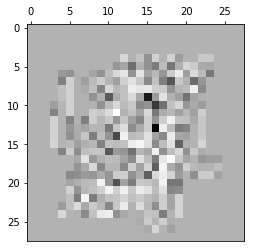

In [36]:
show(pixels)

In [37]:
labels = []
for i in range(10):
    label, pixel = training_data[i]
    labels.append(label)
print (labels, 'Mean:{:.2f}'.format(np.mean(labels)))

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4] Mean:3.00


In [39]:
def padding(img):
    result = np.zeros([32,32])
    for i in range(28):
        for j in range(28):
            result[i+2,j+2] = img[i,j]
    return result

In [40]:
label, pixel = training_data[0]
img = padding(pixel)
ascii_show(img.astype(np.uint8))

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 03 12 12 12 7E 88 AF 1A A6 FF F7 7F 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 1E 24 5E 9A AA FD FD FD FD FD E1 AC FD F2 C3 40 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 31 EE FD FD FD FD FD FD FD FD FB 5D 52 52 38 27 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 12 